In [1]:
import pandas as pd
import numpy as np

file_path = 'final_data.csv'

def load_data(file):
    return pd.read_csv(file)


In [2]:
forest_fire = load_data(file_path)

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'rh'}>, <Axes: title={'center': 'ws'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'ffmc'}>,
        <Axes: title={'center': 'dmc'}>],
       [<Axes: title={'center': 'dc'}>, <Axes: title={'center': 'isi'}>,
        <Axes: title={'center': 'bui'}>],
       [<Axes: title={'center': 'fwi'}>,
        <Axes: title={'center': 'classes'}>,
        <Axes: title={'center': 'region'}>]], dtype=object)

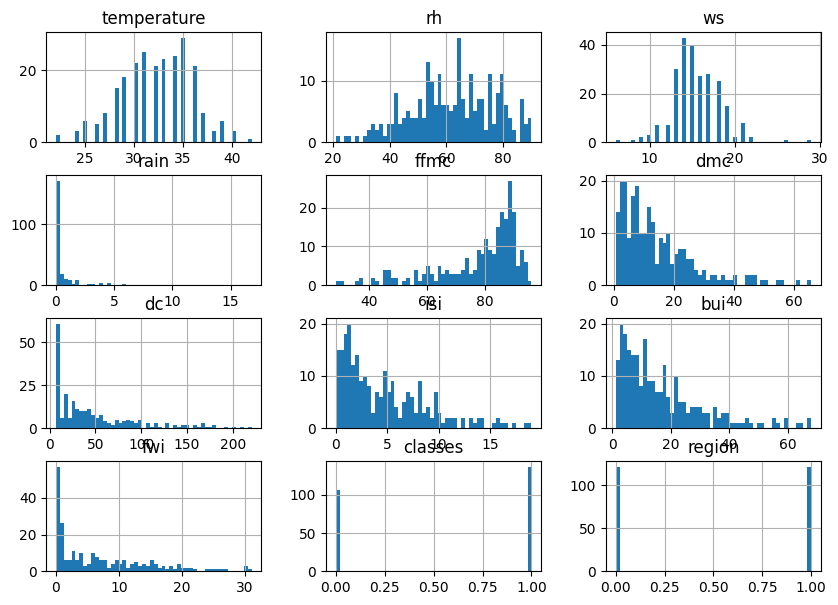

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#show number of instances for each numerical attribute
forest_fire.hist(bins=50, figsize=(10,7))

In [4]:
X = forest_fire.drop(['fwi'], axis=1)
y = (forest_fire['fwi'])

In [5]:
from sklearn.model_selection import train_test_split

def create_train_test_set(df, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = create_train_test_set(forest_fire, 0.2, 42)

In [7]:
corr_matrix = X_train.corr()

<Axes: >

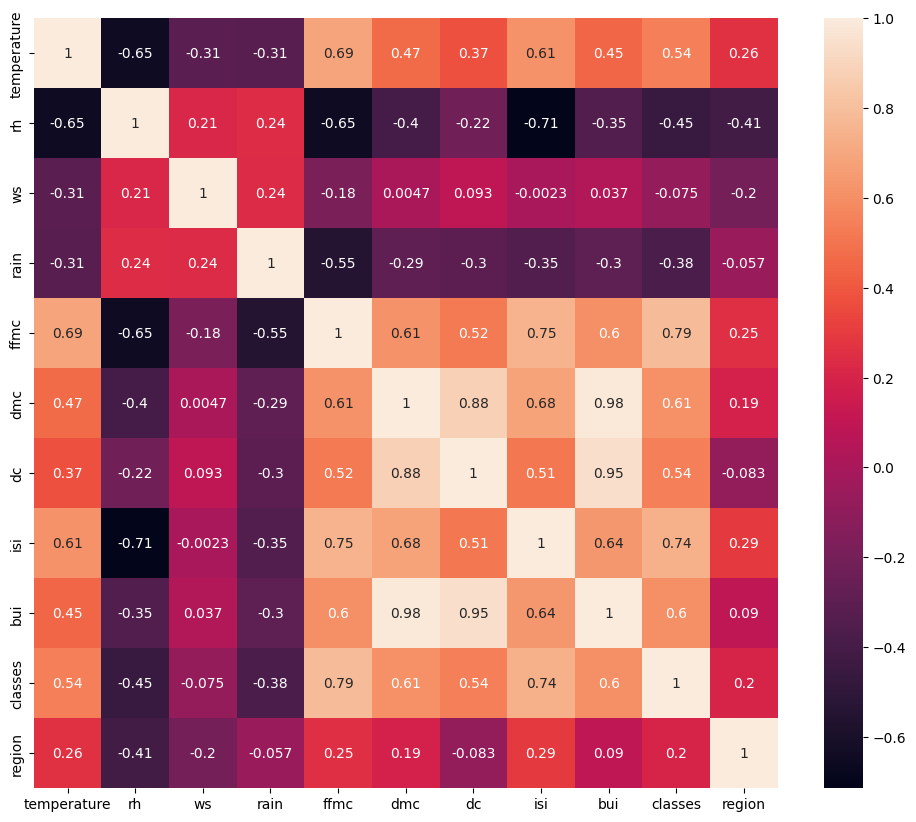

In [8]:
import seaborn as sns
plt.figure(figsize=(12,10)) 
sns.heatmap(data=corr_matrix,annot=True)

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):        
        for j in range(i):            
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(X_train,0.85)

In [11]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
predict_y = regressor.predict(X_test_scaled)

In [14]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, predict_y)

In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predict_y)
print("{:.1%}".format(score))

98.1%


In [26]:
import pickle
pickle.dump(regressor, open('LinearRegression.pkl', 'wb'))

Text(0, 0.5, 'Residuals (y_test - predict_y)')

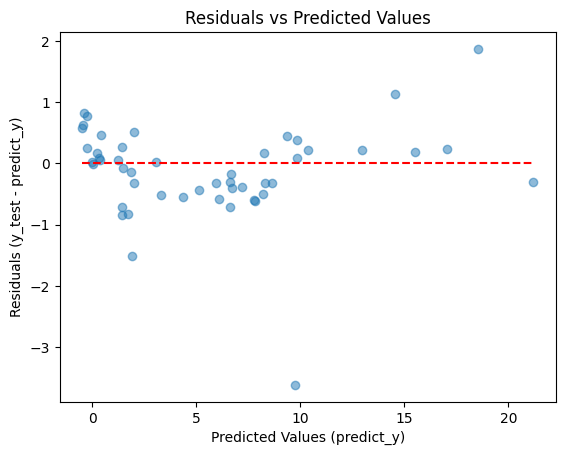

In [16]:
residuals = y_test - predict_y
plt.scatter(predict_y, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(predict_y), xmax=max(predict_y), colors='r', linestyles='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values (predict_y)')
plt.ylabel('Residuals (y_test - predict_y)')

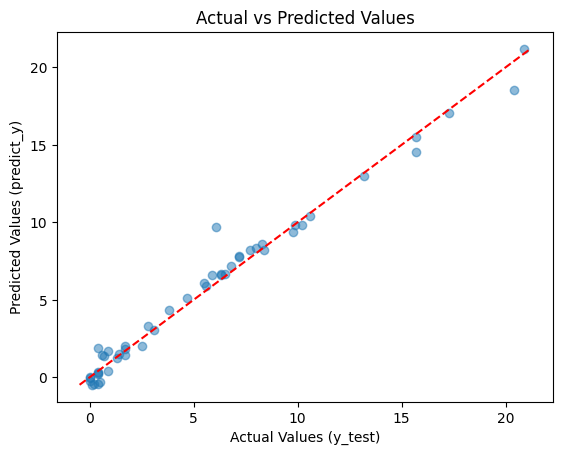

In [17]:
plt.scatter(y_test, predict_y, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (predict_y)')

# Add a reference line (perfect prediction)
min_val = min(min(y_test), min(predict_y))
max_val = max(max(y_test), max(predict_y))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

## Lasso

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score: {:.1%}".format(score))

Mean absolute error 1.0093958923873407
R2 Score: 94.3%


Text(0, 0.5, 'Residuals (y_test - y_pred)')

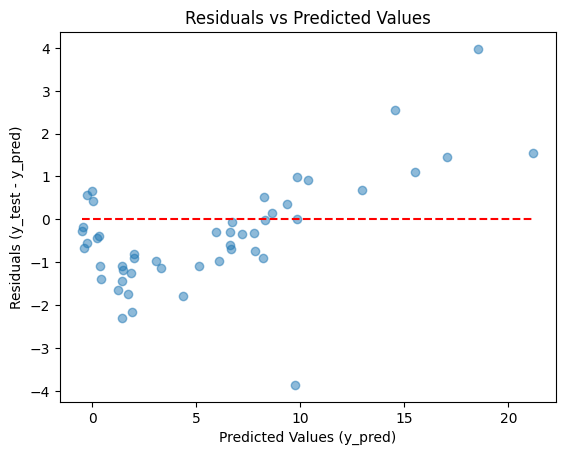

In [19]:
residuals = y_test - y_pred
plt.scatter(predict_y, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(predict_y), xmax=max(predict_y), colors='r', linestyles='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')

### LASSO CV

Mean absolute error 0.5556715031617872
R2 Score: 97.8%


Text(0, 0.5, 'Residuals (y_test - y_pred)')

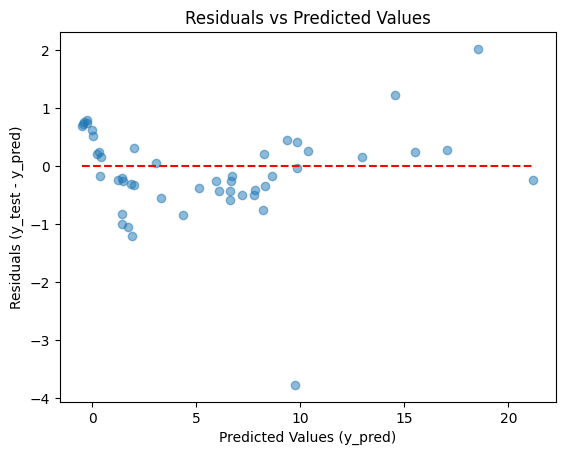

In [23]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score: {:.1%}".format(score))
residuals = y_test - y_pred
plt.scatter(predict_y, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(predict_y), xmax=max(predict_y), colors='r', linestyles='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')

In [24]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}